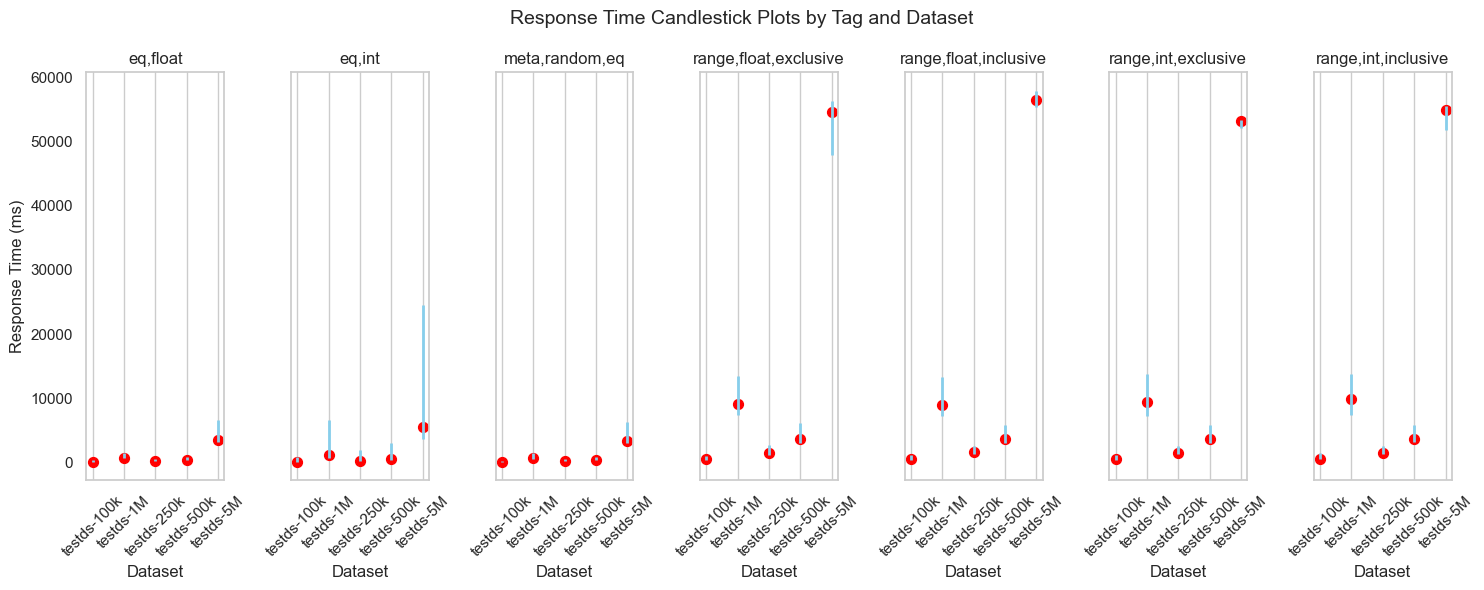

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_parquet("../merged_locust_data-3105.parquet", engine='pyarrow')
# Filtering rows with element containing "range"
# filtered_df = df[df['tags'].apply(lambda x: 'range' in x)]
df.loc[:, "tags"] = df["tags"].apply(lambda x: ",".join(x))
# Filtering rows with data_set "100k"
# filtered_df = df[df['dataset'] == "testds-500k"]
sns.set(style="whitegrid")
# Calculating the median response time for each tag

df_stats = df.groupby(['tags', 'dataset'])['response_time'].agg(['min', 'max', 'median'])
df_stats = df_stats.reset_index() # Assign back to df_stats
df_stats.columns = ['Tag', 'Dataset', 'Min', 'Max', 'Median']

# Plotting using seaborn

# Creating subplots for better organization
fig, axs = plt.subplots(nrows=1, ncols=len(df_stats['Tag'].unique()), figsize=(15, 6), sharey=True)

# Plotting each tag separately as candlesticks
for i, tag in enumerate(df_stats['Tag'].unique()):
    tag_data = df_stats[df_stats['Tag'] == tag]

    # Candlestick plot
    axs[i].vlines(x=tag_data['Dataset'], ymin=tag_data['Min'], ymax=tag_data['Max'], color='skyblue', linewidth=2)
    axs[i].scatter(x=tag_data['Dataset'], y=tag_data['Median'], color='red', marker='o', s=50)

    axs[i].set_title(tag)
    axs[i].set_xlabel('Dataset')
    if i == 0:  # Y-label only for the first plot
        axs[i].set_ylabel('Response Time (ms)')
    axs[i].set_xticks(tag_data['Dataset'])
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y')

plt.suptitle('Response Time Candlestick Plots by Tag and Dataset', fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

df = pd.read_parquet("../merged_locust_data.parquet", engine='pyarrow')
df.loc[:, "tags"] = df["tags"].apply(lambda x: ",".join(x))

# Calculate statistics for candlesticks
df_stats = df.groupby(['tags', 'dataset'])['response_time'].agg(['min', 'max', 'median'])

# Reshape for plotting
df_stats = df_stats.reset_index()
df_stats.columns = ['Tag', 'Dataset', 'Min', 'Max', 'Median']

# Plotting all tags together in a single plot
plt.figure(figsize=(12, 8))

# Convert dataset values to numeric ONCE for the whole df_stats
df_stats['Dataset'] = pd.to_numeric(df_stats['Dataset'], errors='coerce')

for tag in df_stats['Tag'].unique():
    tag_data = df_stats[df_stats['Tag'] == tag]

    # No need to convert again within the loop, but cast to int
    x_positions = [i + (j * 0.2) for i, j in enumerate(tag_data['Dataset'].astype(int))]

    # Candlestick plot
    plt.vlines(x=x_positions, ymin=tag_data['Min'], ymax=tag_data['Max'], color='skyblue', linewidth=2, label=tag if i == 0 else "")
    plt.scatter(x=x_positions, y=tag_data['Median'], color='red', marker='o', s=50)

# Customize x-axis labels using converted numeric values
plt.xticks([i + 0.1 for i in range(len(df_stats['Dataset'].unique()))],
           df_stats['Dataset'].unique().astype(int),
           rotation=45)

plt.xlabel('Dataset')
plt.ylabel('Response Time')
plt.title('Response Time Candlestick Plot by Tag and Dataset', fontsize=14)
plt.legend(title='Tag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

<Figure size 1200x800 with 0 Axes>